In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\pyth

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("fedata.csv")
df=df.drop(['winner'], axis=1)
df1 = pd.read_csv("data_full.csv")
features = df.columns
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
df_y = pd.DataFrame(df1['winner'])
# Categorical boolean mask
categorical_feature_mask = df_y.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_y.columns[categorical_feature_mask].tolist()
# apply le on categorical feature columns
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))
X_all = df[features]
from sklearn.model_selection import train_test_split

y_all =df1['winner']

X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

In [8]:
# baseline model
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(887, input_dim=41, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [5]:
X_train

,B__Prev,B__Age,B__Height,B__Weight,Last_round,Max_round,R__Prev,R__Age,R__Height,R__Weight,...,StrikesDistance Body Punches,StrikesDistance Body Kicks,StrikesPunches,StrikesBody Significant Strikes,StrikesHead Total Strikes,StrikesSignificant Strikes,B_HomeTown,B_Location,R_HomeTown,R_Location
254,0,31.0,172.0,61.0,1,3,1,36.0,180.0,61.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,329,558,594,456
1032,1,40.0,180.0,77.0,1,3,4,34.0,185.0,84.0,...,0.0,0.0,0.0,0.000000,0.269231,4.830508,517,22,640,491
2206,2,25.0,172.0,65.0,3,3,10,30.0,177.0,65.0,...,0.0,0.0,0.0,3.436849,0.000000,62.680702,531,419,338,291
937,4,30.0,180.0,77.0,3,3,4,40.0,185.0,77.0,...,0.0,0.0,0.0,0.000000,0.000000,18.081802,511,409,513,397
648,1,34.0,180.0,70.0,3,3,3,28.0,180.0,70.0,...,0.0,0.0,0.0,12.258737,6.160916,73.895385,92,526,234,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,37.0,190.0,106.0,3,3,4,38.0,195.0,118.0,...,0.0,0.0,0.0,0.363248,0.000000,0.000000,140,138,262,4
1731,6,34.0,167.0,61.0,1,3,3,37.0,172.0,61.0,...,0.0,0.0,0.0,1.786441,0.000000,7.027366,79,62,582,448
763,3,39.0,175.0,70.0,3,3,3,35.0,172.0,70.0,...,0.0,0.0,0.0,4.775510,0.000000,9.905562,556,421,536,414
835,0,32.0,172.0,70.0,3,3,0,29.0,172.0,70.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,193,79,18,121


In [9]:
...
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)


In [10]:
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
tensorflow.python.framework.errors_impl.InvalidArgumentError: Received a label value of 3 which is outside the valid range of [0, 1).  Label values: 3 3 3 3 0
	 [[{{node loss_10/dense_22_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]

  FitFailedWarning)
C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
tensorflow.python.framework.errors_impl.InvalidArgumentError: Received a label value of 3 which is outside the valid range of [0, 1).  Label values: 3 0 0 3 0
	 [[{{node loss_11/dense_24_loss/sparse_categorical_crossentro

Baseline: nan% (nan%)


C:\Users\soura\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
tensorflow.python.framework.errors_impl.InvalidArgumentError: Received a label value of 3 which is outside the valid range of [0, 1).  Label values: 3 0 3 3 3
	 [[{{node loss_19/dense_40_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]

  FitFailedWarning)


In [85]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [112]:
def create_model():
  return tf.keras.models.Sequential([
        tf.keras.layers.Dense(168, input_dim=168,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [102]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#log_dir = "logs/fit/" +"events.out.tfevents.1587536516.LAPTOP-QOGBL7D6"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
### new method

# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=41, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=100, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
1854/1854 [==============================] - 1s 574us/step - loss: -4942.7753 - accuracy: 0.0086
Epoch 2/100
1854/1854 [==============================] - 1s 424us/step - loss: -1514986.5093 - accuracy: 0.0070
Epoch 3/100
1854/1854 [==============================] - 1s 501us/step - loss: -35318807.4789 - accuracy: 0.0070
Epoch 4/100
1854/1854 [==============================] - 1s 530us/step - loss: -278103718.9606 - accuracy: 0.0070
Epoch 5/100
1854/1854 [==============================] - 1s 530us/step - loss: -1290506202.3258 - accuracy: 0.0070
Epoch 6/100
1854/1854 [==============================] - 1s 526us/step - loss: -4183867748.9385 - accuracy: 0.0070
Epoch 7/100
1854/1854 [==============================] - 1s 541us/step - loss: -11191077941.2816 - accuracy: 0.0070
Epoch 8/100
1854/1854 [==============================] - 1s 558us/step - loss: -25668834252.9105 - accuracy: 0.0070
Epoch 9/100
1854/1854 [==============================] - 1s 536us/step - loss: -5317963458

In [11]:
pip install GraphViz 

Note: you may need to restart the kernel to use updated packages.


In [12]:
from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [12]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
1854/1854 [==============================] - 1s 322us/step - loss: -7713042793835356.0000 - accuracy: 0.0070
Epoch 2/100
1854/1854 [==============================] - 1s 519us/step - loss: -8078257171511417.0000 - accuracy: 0.0070
Epoch 3/100
1854/1854 [==============================] - 1s 593us/step - loss: -8458180052828637.0000 - accuracy: 0.0070
Epoch 4/100
1854/1854 [==============================] - 1s 610us/step - loss: -8852724667222619.0000 - accuracy: 0.0070
Epoch 5/100
1854/1854 [==============================] - 1s 625us/step - loss: -9259776672318058.0000 - accuracy: 0.0070
Epoch 6/100
1854/1854 [==============================] - 1s 604us/step - loss: -9684451789658490.0000 - accuracy: 0.0070
Epoch 7/100
1854/1854 [==============================] - 1s 572us/step - loss: -10122504227199264.0000 - accuracy: 0.0070
Epoch 8/100
1854/1854 [==============================] - 1s 551us/step - loss: -10576611784204226.0000 - accuracy: 0.0070
Epoch 9/100
1854/1854 [=======

In [14]:
import matplotlib.pyplot as plt

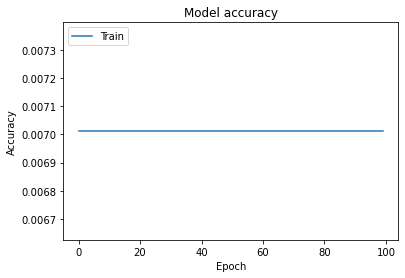

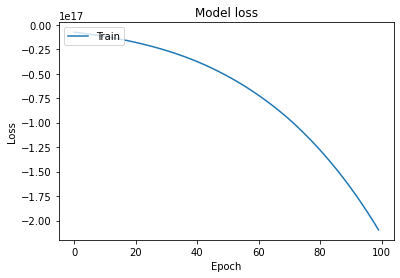

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [130]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 168)               28392     
_________________________________________________________________
dropout_4 (Dropout)          (None, 168)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1690      
Total params: 30,082
Trainable params: 30,082
Non-trainable params: 0
_________________________________________________________________


In [144]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [ ]:
EPOCHS = 100
BS = 32

In [ ]:
tensorboard --logdir logs/fit

In [34]:
pip install scipy==1.2

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\soura\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [1]:
pip install talos

  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-py3-none-any.whl size=3608 sha256=fc1715e7270e566c7eb1f4e590a3d9f8d2b60fb5b336ceeba448d28ec16100bf
  Stored in directory: c:\users\soura\appdata\local\pip\cache\wheels\1c\b4\c8\d1533d85f7fc617e3201c3f41b79fe49ae9284c8fc4a5bd4b2
  Created wheel for astetik: filename=astetik-1.9.9-py3-none-any.whl size=56971 sha256=9d9da097bd5eafa330a7d9086f9f061a1770e3d4347dce1e1a8388e9aa79b7dc
  Stored in directory: c:\users\soura\appdata\local\pip\cache\wheels\b2\6f\46\33d4db84472eb1f4b6a9bfdc12fab667ee37e1cd10eff9d584
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41613 sha256=e7d11ecab751159f7b228f3f88f4a71d5246fd0d656394b57e170a352c75b104
  Stored in directory: c:\users\soura\appdata\local\pip\cache\wheels\f3\2e\7e\316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
  Created wheel for wrangle: filename=wrangle-0.6.7-py3-none-any.whl size=49899 sha256=304dd02c353fca17ed73e219dc9f669cea675b85d71cc0c45d3c91d8e3375

ERROR: wrangle 0.6.7 has requirement scipy==1.2, but you'll have scipy 1.4.1 which is incompatible.


In [118]:
# then we can go ahead and set the parameter space
p = {'lr': (0.5, 5, 10),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (2, 30, 10),
     'epochs': [150],
     'dropout': (0, 0.5, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': ['adam', 'nadam', 'RMSprop'],
     'losses': ['logcosh', 'binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

In [119]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(histogram_freq=1)

model.fit(x=X_train, 
          y=encoded_Y, 
          epochs=5, 
          validation_data=(X_test, encoded_Y_test))

Train on 1854 samples, validate on 464 samples
Epoch 1/5
1854/1854 [==============================] - ETA: 18s - loss: 663.4927 - acc: 0.0000e+ - ETA: 1s - loss: 361.2121 - acc: 0.2812     - ETA: 0s - loss: 265.2721 - acc: 0.384 - ETA: 0s - loss: 220.9129 - acc: 0.420 - ETA: 0s - loss: 192.4419 - acc: 0.438 - ETA: 0s - loss: 172.7057 - acc: 0.451 - 1s 678us/sample - loss: 166.3853 - acc: 0.4536 - val_loss: 61.0971 - val_acc: 0.5625
Epoch 2/5
1854/1854 [==============================] - ETA: 0s - loss: 89.2423 - acc: 0.59 - ETA: 0s - loss: 109.1893 - acc: 0.562 - ETA: 0s - loss: 97.1045 - acc: 0.526 - ETA: 0s - loss: 99.4663 - acc: 0.53 - ETA: 0s - loss: 94.2778 - acc: 0.52 - ETA: 0s - loss: 90.3833 - acc: 0.51 - ETA: 0s - loss: 86.1238 - acc: 0.51 - 0s 211us/sample - loss: 85.4687 - acc: 0.5167 - val_loss: 54.5984 - val_acc: 0.5517
Epoch 3/5
1854/1854 [==============================] - ETA: 0s - loss: 64.2175 - acc: 0.62 - ETA: 0s - loss: 74.3486 - acc: 0.51 - ETA: 0s - loss: 66.3710 -

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [28]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(input_dim=41,units=hp.Int('units',
                                        min_value=300,
                                        max_value=552,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(171, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [29]:
tuner = RandomSearch(
    build_model,
    objective='val_acc',
    max_trials=5,
    executions_per_trial=3,
directory='ss',
    project_name='ss')

INFO:tensorflow:Reloading Oracle from existing project ss\ss\oracle.json


In [31]:
tuner.search(X_train, Y_train,
             epochs=5,
             validation_data=(X_test, Y_test))

Train on 1854 samples, validate on 464 samples
Epoch 1/5
1854/1854 [==============================] - ETA: 6s - loss: 147.3794 - acc: 0.0000e+0 - ETA: 0s - loss: 39.2705 - acc: 0.4928    - ETA: 0s - loss: 30.4367 - acc: 0.46 - ETA: 0s - loss: 25.6600 - acc: 0.48 - ETA: 0s - loss: 21.0454 - acc: 0.47 - ETA: 0s - loss: 18.8056 - acc: 0.48 - 1s 481us/sample - loss: 18.0584 - acc: 0.4860 - val_loss: 9.7913 - val_acc: 0.5819
Epoch 2/5
1854/1854 [==============================] - ETA: 0s - loss: 10.1412 - acc: 0.50 - ETA: 0s - loss: 5.8985 - acc: 0.5365 - ETA: 0s - loss: 5.3058 - acc: 0.519 - ETA: 0s - loss: 4.3207 - acc: 0.511 - ETA: 0s - loss: 3.9221 - acc: 0.512 - ETA: 0s - loss: 3.5118 - acc: 0.515 - 0s 188us/sample - loss: 3.3826 - acc: 0.5129 - val_loss: 1.3755 - val_acc: 0.4763
Epoch 3/5
1854/1854 [==============================] - ETA: 0s - loss: 1.1291 - acc: 0.562 - ETA: 0s - loss: 1.9247 - acc: 0.541 - ETA: 0s - loss: 2.2375 - acc: 0.523 - ETA: 0s - loss: 2.3638 - acc: 0.523 - ETA

Train on 1854 samples, validate on 464 samples
Epoch 1/5
1854/1854 [==============================] - ETA: 6s - loss: 92.1803 - acc: 0.0000e+ - ETA: 0s - loss: 24.6315 - acc: 0.3516   - ETA: 0s - loss: 17.3393 - acc: 0.42 - ETA: 0s - loss: 13.8951 - acc: 0.44 - ETA: 0s - loss: 12.3100 - acc: 0.44 - ETA: 0s - loss: 11.4746 - acc: 0.44 - ETA: 0s - loss: 10.6287 - acc: 0.45 - 1s 538us/sample - loss: 10.2850 - acc: 0.4579 - val_loss: 3.9605 - val_acc: 0.5797
Epoch 2/5
1854/1854 [==============================] - ETA: 0s - loss: 3.4465 - acc: 0.593 - ETA: 0s - loss: 3.8210 - acc: 0.542 - ETA: 0s - loss: 3.1039 - acc: 0.529 - ETA: 0s - loss: 2.7524 - acc: 0.539 - ETA: 0s - loss: 2.6786 - acc: 0.550 - ETA: 0s - loss: 2.5874 - acc: 0.544 - 0s 198us/sample - loss: 2.5171 - acc: 0.5458 - val_loss: 2.4243 - val_acc: 0.5539
Epoch 3/5
1854/1854 [==============================] - ETA: 0s - loss: 1.9232 - acc: 0.531 - ETA: 0s - loss: 1.9495 - acc: 0.545 - ETA: 0s - loss: 2.4108 - acc: 0.537 - ETA: 0s

Train on 1854 samples, validate on 464 samples
Epoch 1/5
1854/1854 [==============================] - ETA: 5s - loss: 116.9538 - acc: 0.0000e+0 - ETA: 0s - loss: 44.4347 - acc: 0.4417    - ETA: 0s - loss: 31.7636 - acc: 0.47 - ETA: 0s - loss: 24.2685 - acc: 0.48 - ETA: 0s - loss: 20.5988 - acc: 0.48 - 1s 483us/sample - loss: 19.5093 - acc: 0.4865 - val_loss: 5.5683 - val_acc: 0.5862
Epoch 2/5
1854/1854 [==============================] - ETA: 0s - loss: 3.8754 - acc: 0.593 - ETA: 0s - loss: 5.5455 - acc: 0.520 - ETA: 0s - loss: 4.2018 - acc: 0.496 - ETA: 0s - loss: 3.3795 - acc: 0.520 - ETA: 0s - loss: 2.9312 - acc: 0.509 - ETA: 0s - loss: 2.6110 - acc: 0.510 - ETA: 0s - loss: 2.4197 - acc: 0.515 - 0s 214us/sample - loss: 2.2827 - acc: 0.5167 - val_loss: 1.0671 - val_acc: 0.4763
Epoch 3/5
1854/1854 [==============================] - ETA: 0s - loss: 0.9052 - acc: 0.531 - ETA: 0s - loss: 1.1776 - acc: 0.519 - ETA: 0s - loss: 1.0771 - acc: 0.524 - ETA: 0s - loss: 1.1304 - acc: 0.508 - ETA:

Train on 1854 samples, validate on 464 samples
Epoch 1/5
1854/1854 [==============================] - ETA: 6s - loss: 110.3548 - acc: 0.0000e+0 - ETA: 0s - loss: 97.7313 - acc: 0.0000e+0 - ETA: 0s - loss: 76.2695 - acc: 0.0496   - ETA: 0s - loss: 59.8701 - acc: 0.11 - ETA: 0s - loss: 47.7543 - acc: 0.19 - 1s 393us/sample - loss: 45.8461 - acc: 0.2082 - val_loss: 5.4533 - val_acc: 0.4634
Epoch 2/5
1854/1854 [==============================] - ETA: 0s - loss: 4.8971 - acc: 0.531 - ETA: 0s - loss: 6.5257 - acc: 0.464 - ETA: 0s - loss: 6.2033 - acc: 0.459 - ETA: 0s - loss: 5.6915 - acc: 0.474 - ETA: 0s - loss: 5.3110 - acc: 0.472 - ETA: 0s - loss: 4.9135 - acc: 0.477 - ETA: 0s - loss: 4.7033 - acc: 0.487 - ETA: 0s - loss: 4.6183 - acc: 0.492 - ETA: 0s - loss: 4.5010 - acc: 0.494 - 1s 428us/sample - loss: 4.4165 - acc: 0.4930 - val_loss: 2.5534 - val_acc: 0.5388
Epoch 3/5
1854/1854 [==============================] - ETA: 0s - loss: 1.3400 - acc: 0.656 - ETA: 0s - loss: 2.7183 - acc: 0.571 - 

Train on 1854 samples, validate on 464 samples
Epoch 1/5
1854/1854 [==============================] - ETA: 5s - loss: 123.1124 - acc: 0.0000e+0 - ETA: 0s - loss: 39.1140 - acc: 0.4353    - ETA: 0s - loss: 32.1001 - acc: 0.45 - ETA: 0s - loss: 28.3491 - acc: 0.46 - ETA: 0s - loss: 24.4918 - acc: 0.47 - 1s 422us/sample - loss: 22.4680 - acc: 0.4741 - val_loss: 10.0881 - val_acc: 0.4203
Epoch 2/5
1854/1854 [==============================] - ETA: 0s - loss: 12.4016 - acc: 0.40 - ETA: 0s - loss: 9.4212 - acc: 0.5089 - ETA: 0s - loss: 8.2270 - acc: 0.478 - ETA: 0s - loss: 7.2493 - acc: 0.476 - ETA: 0s - loss: 6.5297 - acc: 0.467 - ETA: 0s - loss: 6.0551 - acc: 0.455 - ETA: 0s - loss: 5.5837 - acc: 0.464 - ETA: 0s - loss: 4.9774 - acc: 0.471 - ETA: 0s - loss: 4.6102 - acc: 0.479 - 1s 434us/sample - loss: 4.4769 - acc: 0.4811 - val_loss: 2.4148 - val_acc: 0.4677
Epoch 3/5
1854/1854 [==============================] - ETA: 0s - loss: 2.0169 - acc: 0.625 - ETA: 0s - loss: 1.8117 - acc: 0.513 - ET

INFO:tensorflow:Oracle triggered exit


In [21]:
models = tuner.get_best_models(num_models=2)

In [22]:
tuner.results_summary()

In [42]:
# dropout in the input layer with weight constraint
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
def create_model():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(41,)))
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(1, activation='sigmoid'))
	# Compile model
    sgd = SGD(lr=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [47]:
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [73]:
def create_model1(neurons=1):
	# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=41, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [74]:

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [76]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
    model = Sequential()
    model.add(Dense(12, input_dim=41, kernel_initializer='uniform', activation=activation))
    model.add(Dense(24, input_dim=41, kernel_initializer='uniform', activation=activation))
    model.add(Dense(24, input_dim=41, kernel_initializer='uniform', activation=activation))
    model.add(Dense(12, input_dim=41, kernel_initializer='uniform', activation=activation))
    model.add(Dense(8, input_dim=41, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.007012 using {'activation': 'softmax'}
0.007012 (0.002018) with: {'activation': 'softmax'}
0.007012 (0.002018) with: {'activation': 'softplus'}
0.007012 (0.002018) with: {'activation': 'softsign'}
0.007012 (0.002018) with: {'activation': 'relu'}
0.007012 (0.002018) with: {'activation': 'tanh'}
0.007012 (0.002018) with: {'activation': 'sigmoid'}
0.007012 (0.002018) with: {'activation': 'hard_sigmoid'}
0.007012 (0.002018) with: {'activation': 'linear'}


In [77]:
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
    model = Sequential()
    model.add(Dense(12, input_dim=41, kernel_initializer='uniform', activation='softmax', kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dense(24, activation='softmax'))
    model.add(Dense(12, activation='softmax'))
    model.add(Dense(12, activation='softmax'))
    model.add(Dense(8, activation='softmax'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset

# split into input (X) and output (Y) variables

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.007012 using {'dropout_rate': 0.0, 'weight_constraint': 1}
0.007012 (0.002018) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.007012 (0.002018) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.007012 (0.002018) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.007012 (0.002018) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.007012 (0.002018) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.007012 (0.002018) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.007012 (0.002018) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.007012 (0.002018) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.007012 (0.002018) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.007012 (0.002018) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.007012 (0.002018) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.007012 (0.002018) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.007012 (0.002018) with: {'dropout_rate': 0.2, 'weight_constraint': 

In [78]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=41, kernel_initializer='uniform', activation='softmax', kernel_constraint=maxnorm(4)))
    model.add(Dense(24, activation='softmax'))
    model.add(Dense(12, activation='softmax'))
    model.add(Dense(12, activation='softmax'))
    model.add(Dense(8, activation='softmax'))
    model.add(Dropout(0))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.007012 using {'neurons': 1}
0.007012 (0.002018) with: {'neurons': 1}
0.007012 (0.002018) with: {'neurons': 5}
0.007012 (0.002018) with: {'neurons': 10}
0.007012 (0.002018) with: {'neurons': 15}
0.007012 (0.002018) with: {'neurons': 20}
0.007012 (0.002018) with: {'neurons': 25}
0.007012 (0.002018) with: {'neurons': 30}
